In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)= keras.datasets.fashion_mnist.load_data()# 패션 mnist데이터 전처리
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2, random_state=42)

c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))#과대 적합 방지
model.add(keras.layers.Dense(10,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

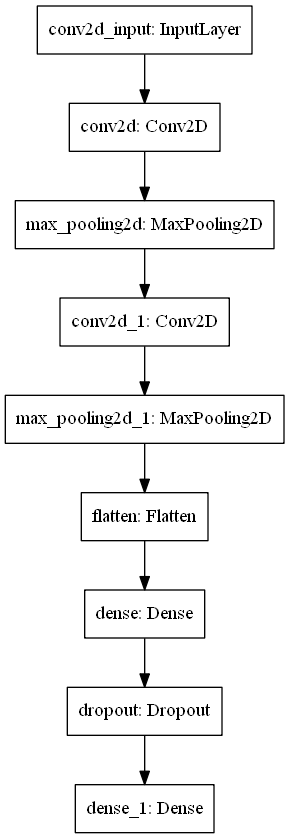

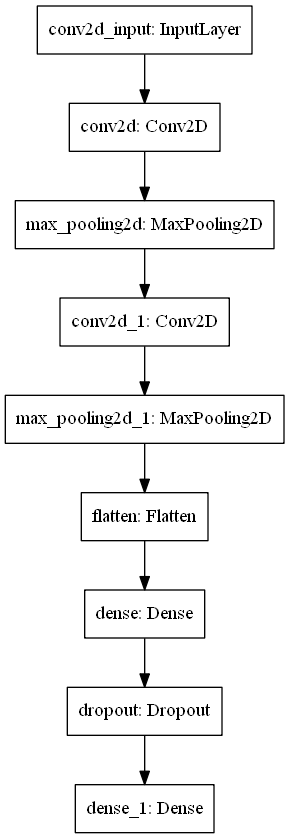

In [6]:
keras.utils.plot_model(model)

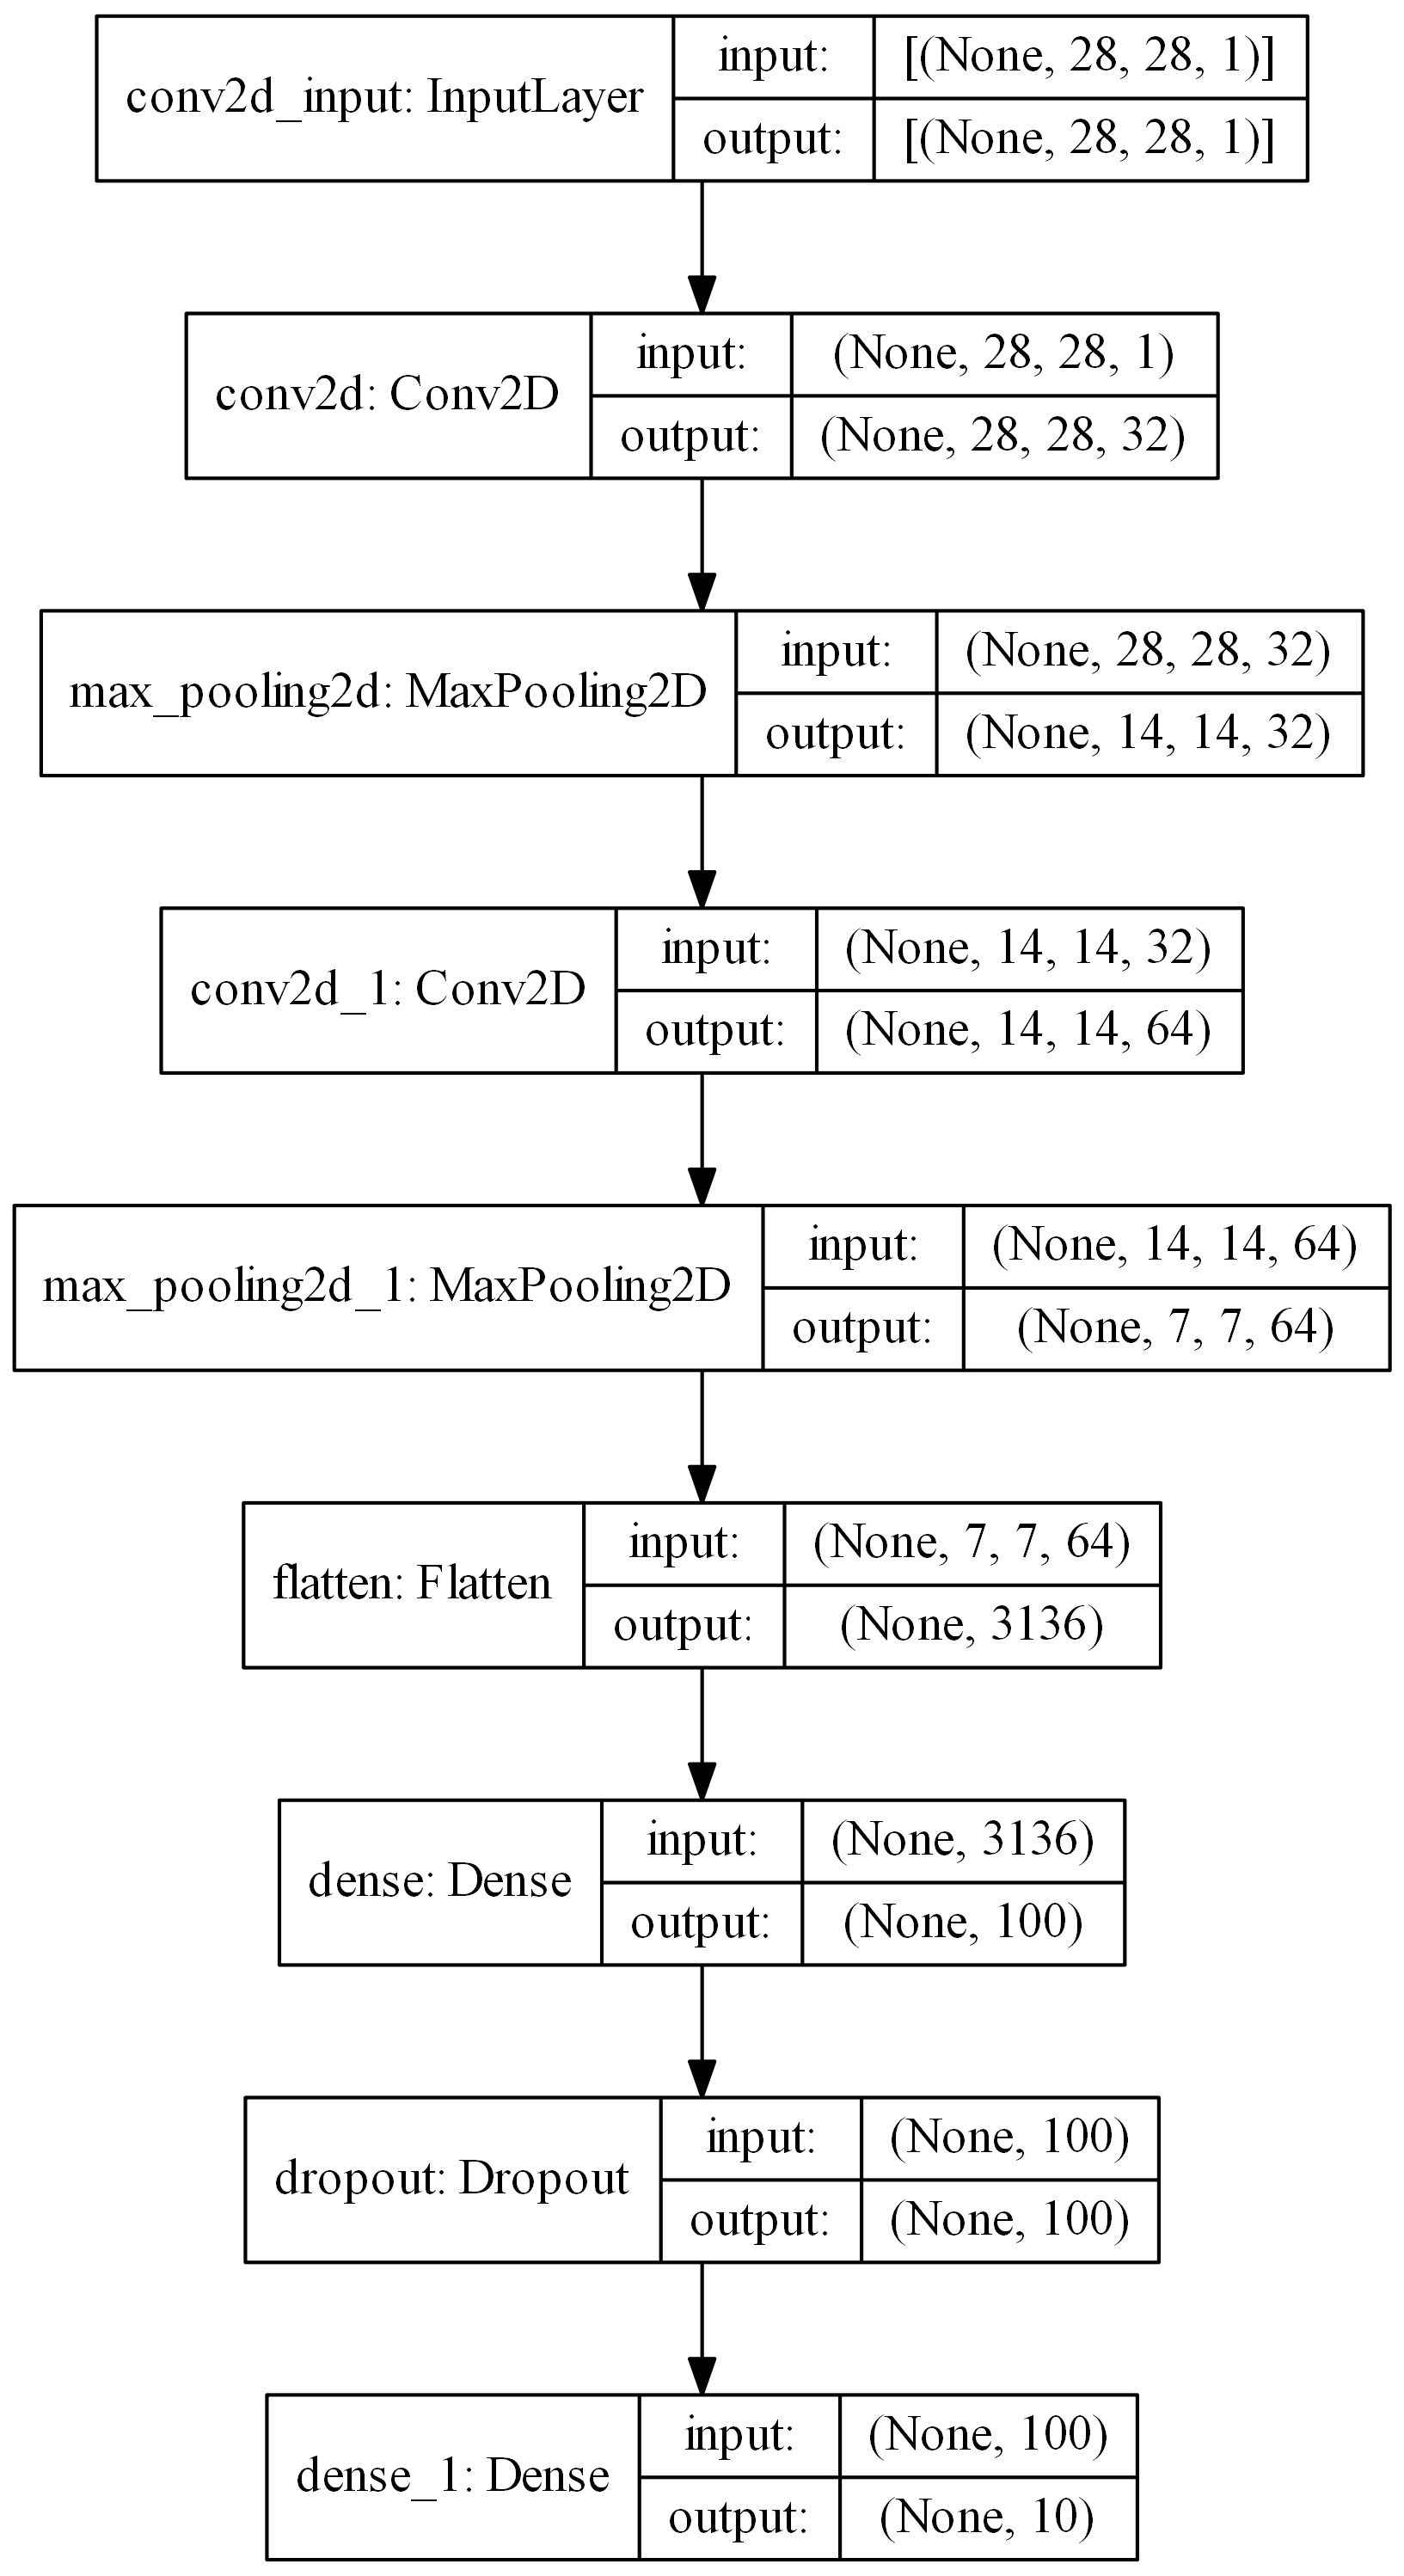

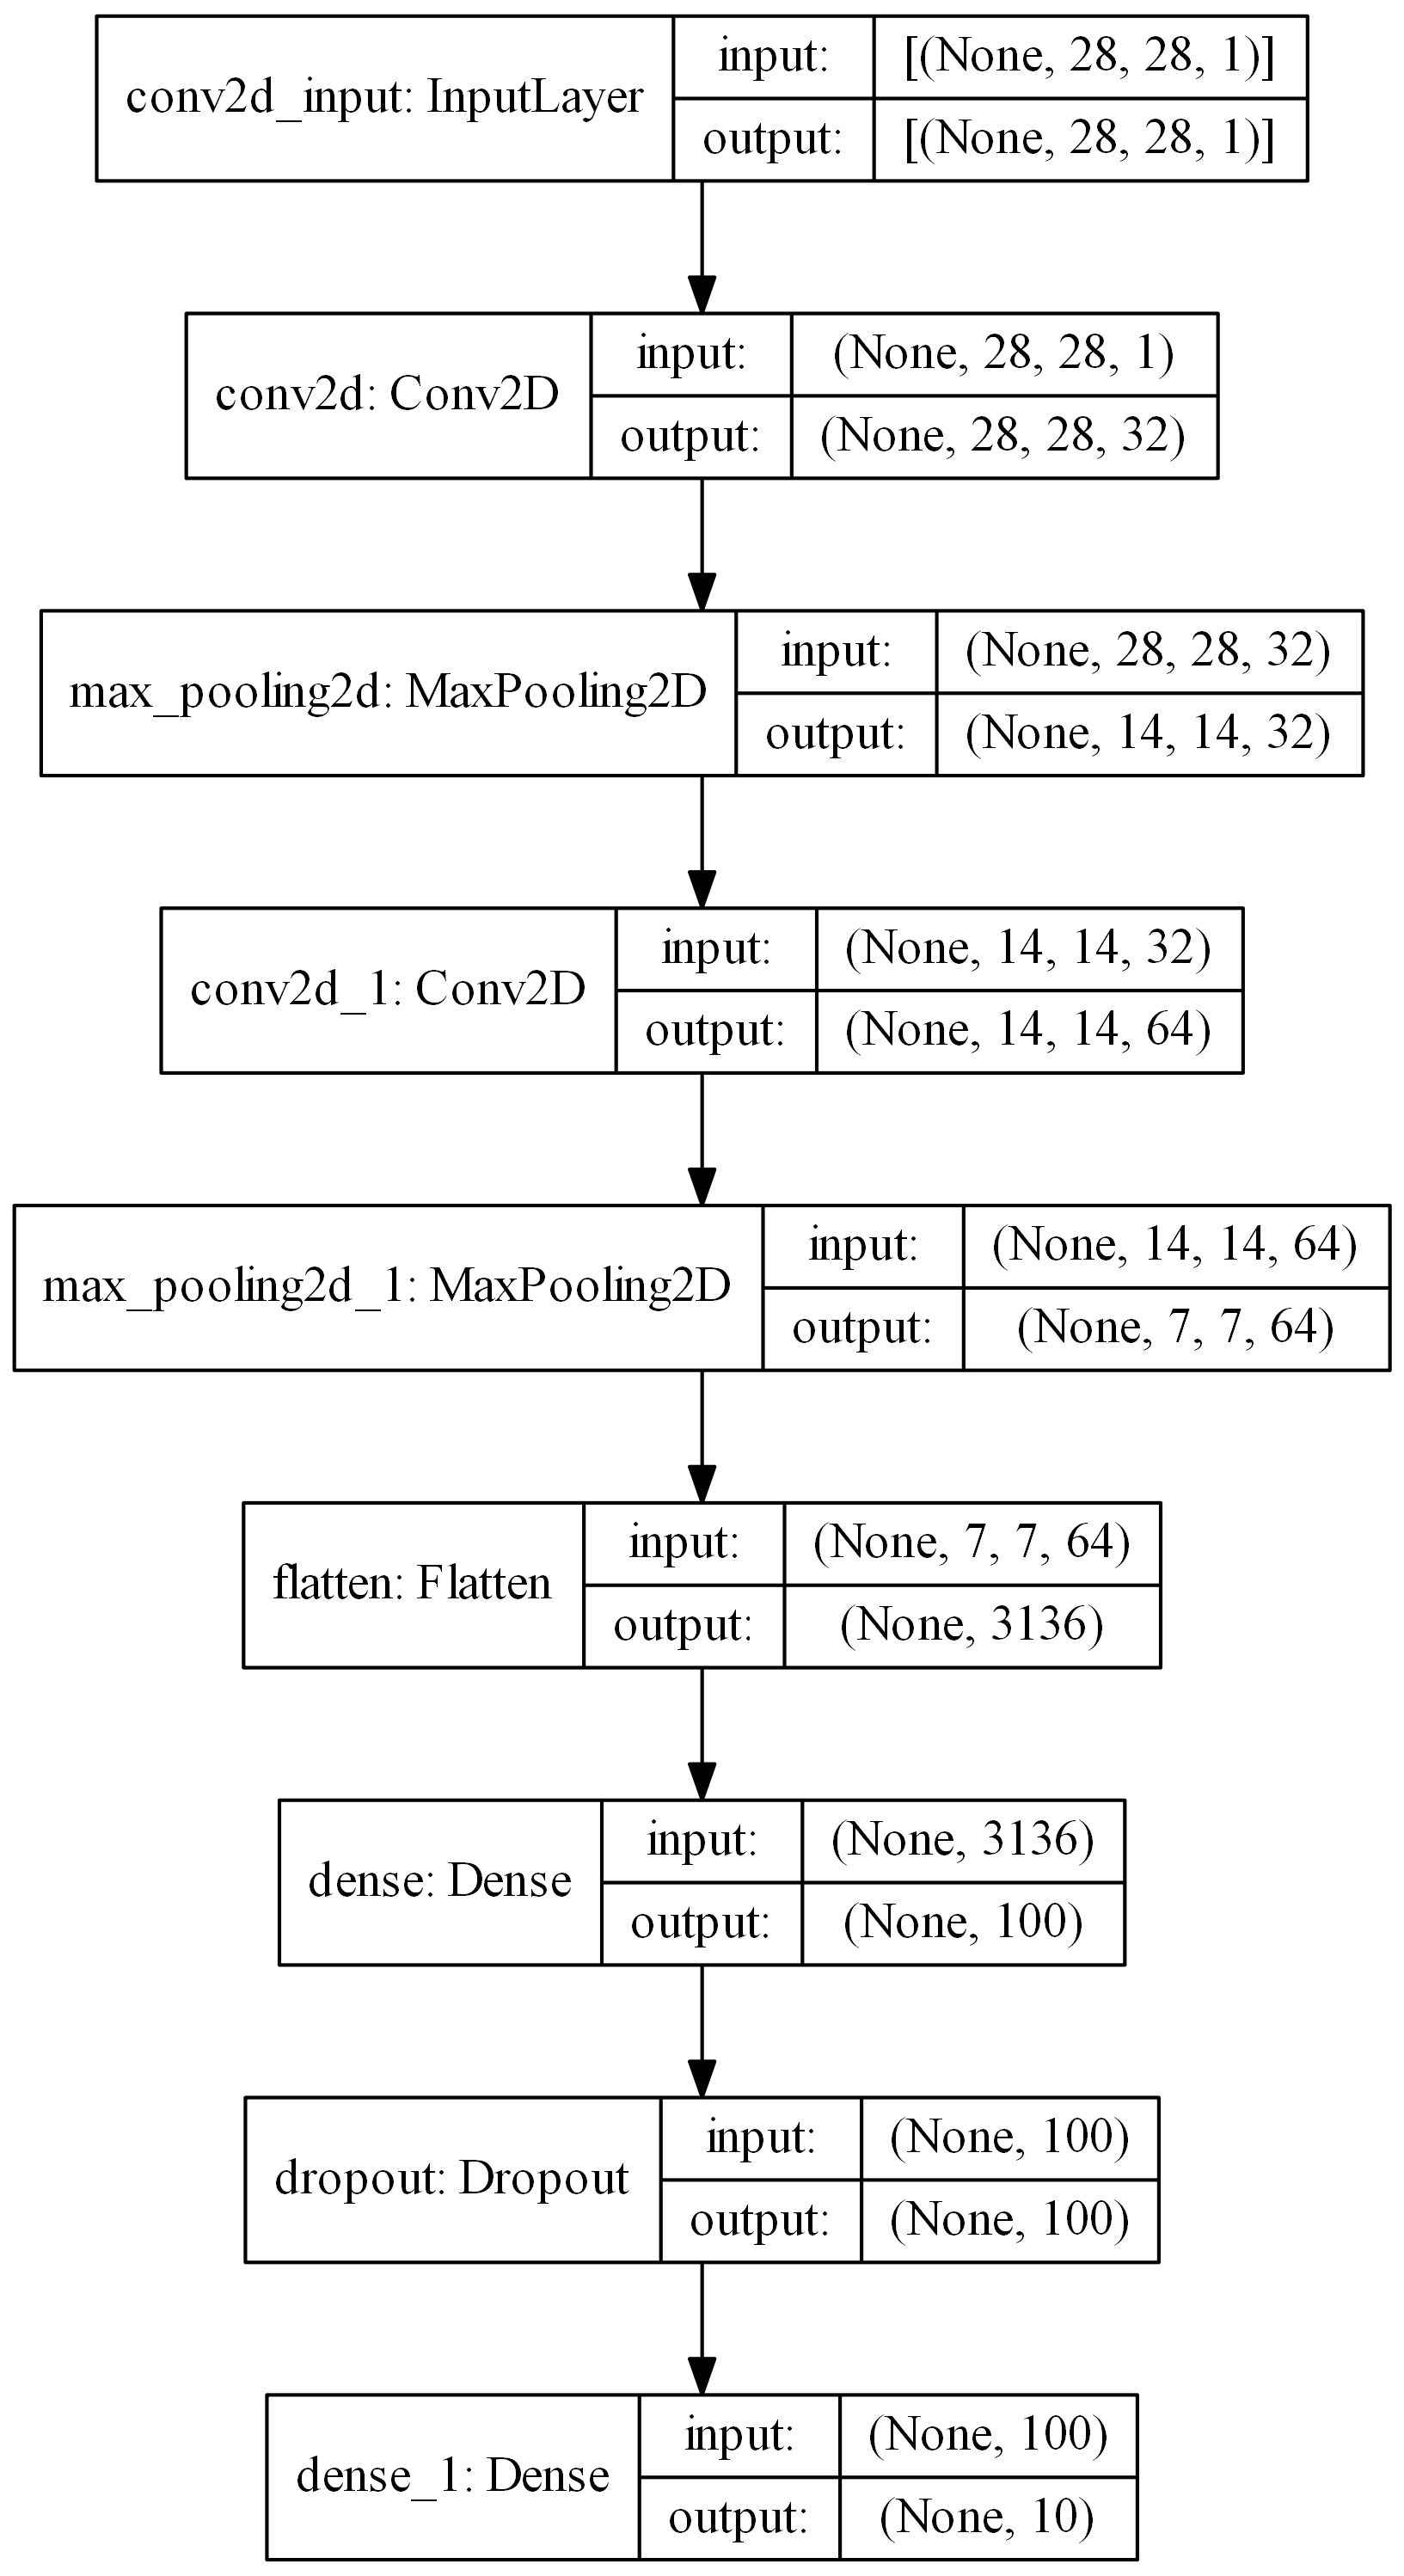

In [7]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn-architecture.png',dpi=300)

In [8]:
#모델 컴파일 및 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - ETA: 0s - loss: 0.4944 - acc: 0.8215

c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


48000/48000 [==============================] - 36s 743us/sample - loss: 0.4944 - acc: 0.8215 - val_loss: 0.3242 - val_acc: 0.8800
Epoch 2/20
48000/48000 [==============================] - 38s 796us/sample - loss: 0.3225 - acc: 0.8855 - val_loss: 0.2803 - val_acc: 0.8973
Epoch 3/20
48000/48000 [==============================] - 39s 805us/sample - loss: 0.2733 - acc: 0.9006 - val_loss: 0.2497 - val_acc: 0.9113
Epoch 4/20
48000/48000 [==============================] - 53s 1ms/sample - loss: 0.2427 - acc: 0.9116 - val_loss: 0.2337 - val_acc: 0.9143
Epoch 5/20
48000/48000 [==============================] - 45s 941us/sample - loss: 0.2191 - acc: 0.9200 - val_loss: 0.2260 - val_acc: 0.9174
Epoch 6/20
48000/48000 [==============================] - 46s 963us/sample - loss: 0.1975 - acc: 0.9273 - val_loss: 0.2273 - val_acc: 0.9193
Epoch 7/20
48000/48000 [==============================] - 59s 1ms/sample - loss: 0.1809 - acc: 0.9339 - val_loss: 0.2201 - val_acc: 0.9206
Epoch 8/20
48000/48000 [====

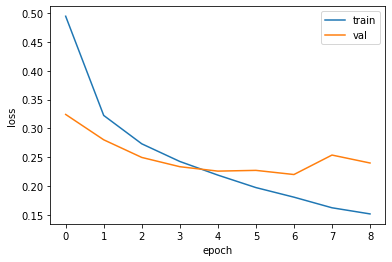

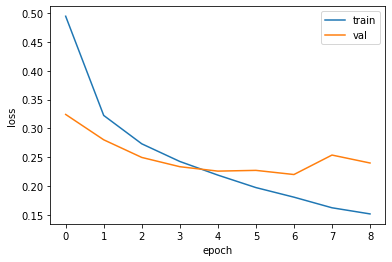

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [11]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


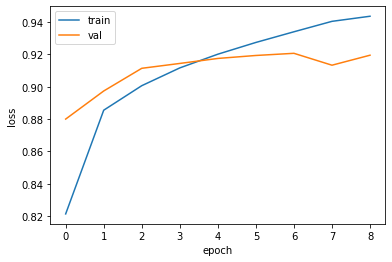

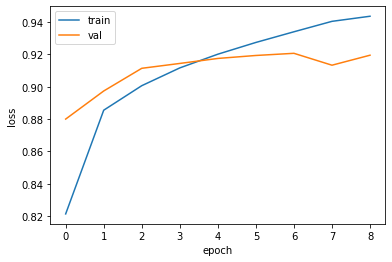

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [15]:
model.evaluate(val_scaled,val_target)

[0.2201124750872453, 0.9205833]

[0.2201124750872453, 0.9205833]

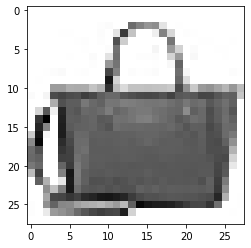

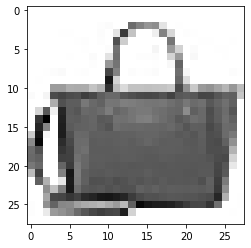

In [16]:
#샘플 이미지 출력
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [17]:
preds=model.predict(val_scaled[0:1])
print(preds)

[[7.8520886e-15 1.1821265e-18 2.8966965e-17 7.3684555e-14 5.5242371e-14
  6.2936335e-15 1.5286967e-15 8.0456752e-11 1.0000000e+00 1.4645437e-12]]
[[7.8520886e-15 1.1821265e-18 2.8966965e-17 7.3684555e-14 5.5242371e-14
  6.2936335e-15 1.5286967e-15 8.0456752e-11 1.0000000e+00 1.4645437e-12]]


c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


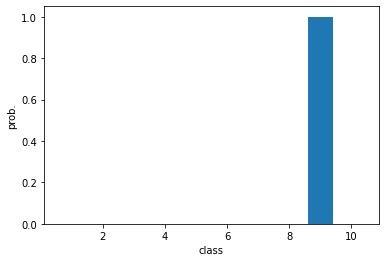

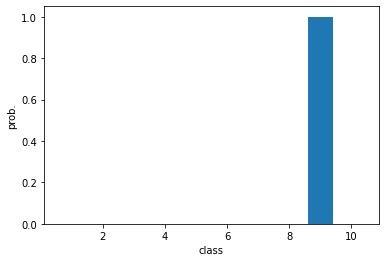

In [18]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [21]:
import numpy as np
print(np.argmax(preds))
print(classes[np.argmax(preds)])

8
가방
8
가방


In [22]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

[0.23904546778798103, 0.9164]

[0.23904546778798103, 0.9164]